Import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

Load data

In [21]:
df = pd.read_csv('togo-dapaong_qc.csv')

In [22]:
# The fist few rows
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


Summary Statistics & Missing-Value Report

In [23]:
# statistical summary
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [24]:
# missing values
missing_values= df.isna().sum()
print("Missing values ", missing_values )

Missing values  Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [25]:
# Columns with >5% nulls
threshold = 0.05 * len(df)
high_missing = missing_values[missing_values > threshold]
print("Columns with > 5% missing values:\n", high_missing)

Columns with > 5% missing values:
 Comments    525600
dtype: int64


In [26]:
# Outlier Detection & Basic Cleaning
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
# Z-score
z_scores = df[columns_to_check].apply(stats.zscore)


In [27]:
#  Outliers where |Z| > 3
outliers = (np.abs(z_scores) > 3)
print("Outliers in each column:\n", outliers.sum())

Outliers in each column:
 GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64


In [28]:
# Drop outliers
df_clean = df[~(outliers.any(axis=1))].copy()

In [29]:
# Impute missing values in key columns
for col in columns_to_check:
    if df_clean[col].isna().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

In [30]:
print(df_clean.columns.tolist())

['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [31]:
# Export Cleaned Data
os.makedirs('data', exist_ok=True)
df_clean.to_csv('data/togo_clean.csv', index=False)

Time Series Analysis

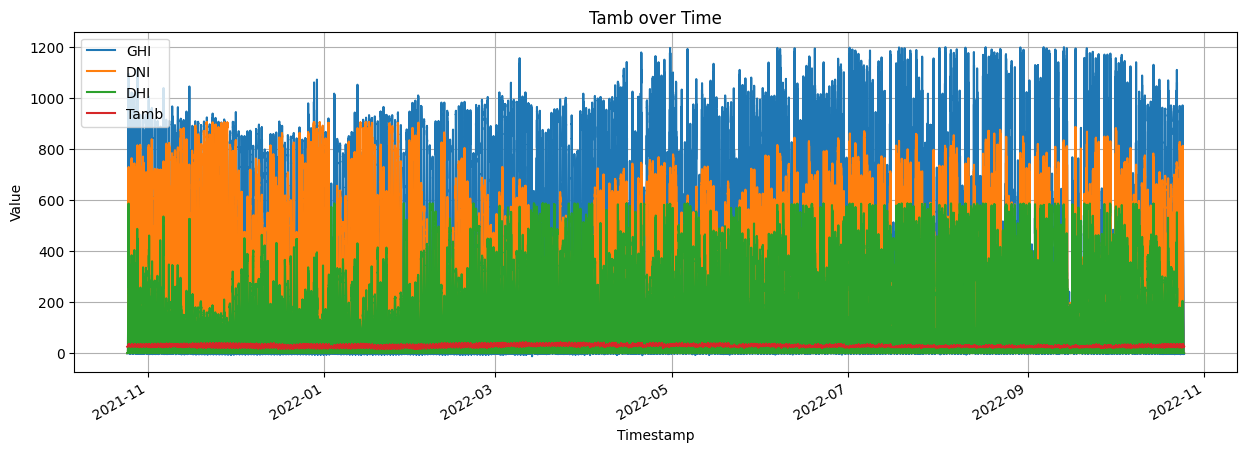

In [32]:
# Parse timestamp
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Set index
df_clean.set_index('Timestamp', inplace=True)

# Plot
df_clean[['GHI', 'DNI', 'DHI','Tamb']].plot(figsize=(15,5))
plt.title("Tamb over Time")
plt.ylabel("Value")
plt.grid()
plt.show()


Cleaning Impact

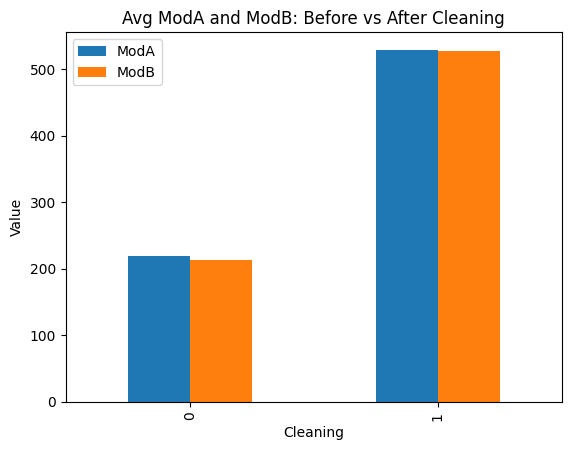

In [34]:
df_clean['Cleaning'] = df_clean['Cleaning'].astype(str)  # Convert to string for plot
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Avg ModA and ModB: Before vs After Cleaning')
plt.ylabel('Value')
plt.show()


Correlation & Relationship Analysis

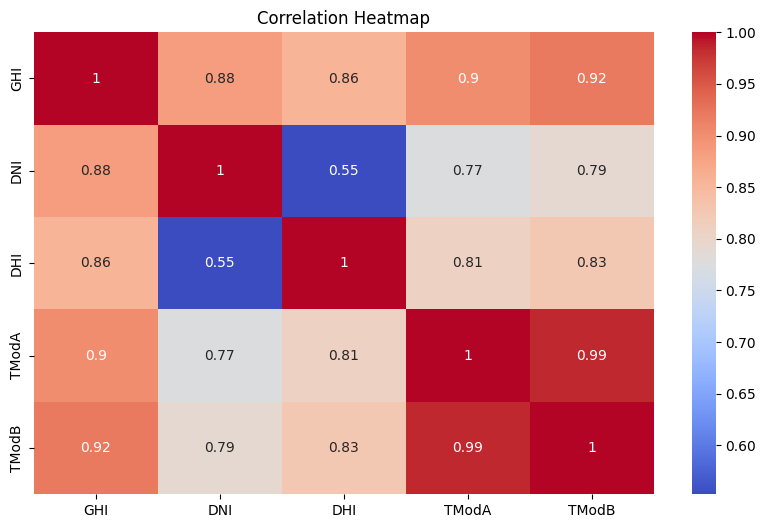

In [35]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


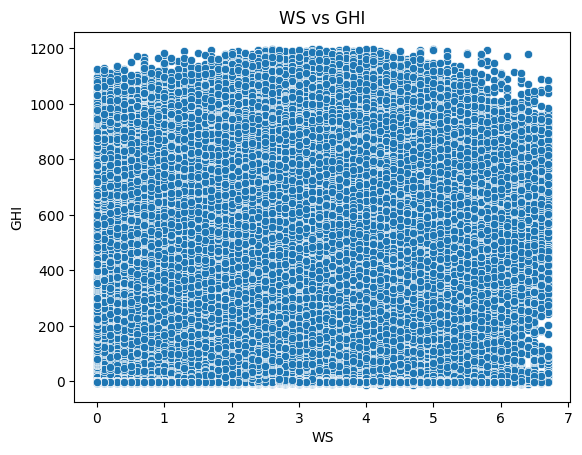

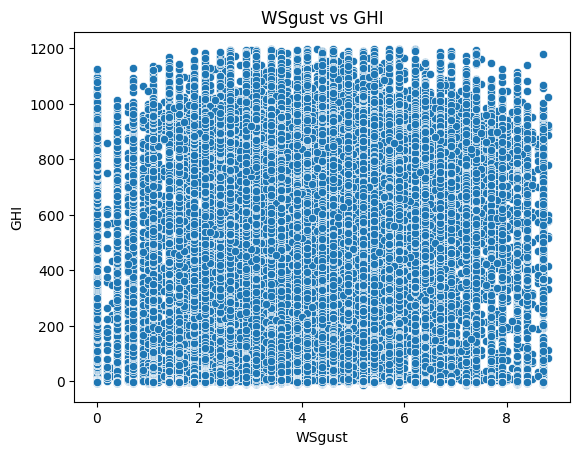

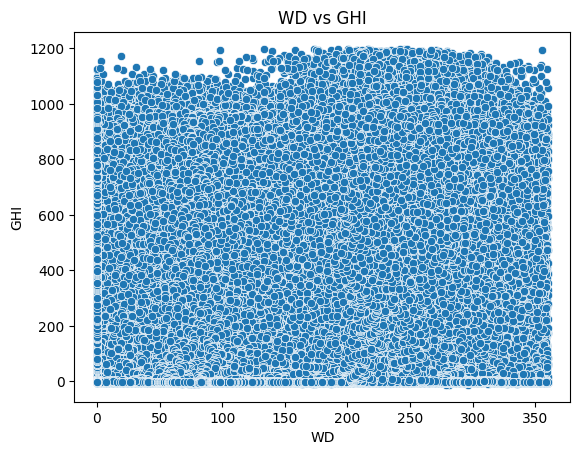

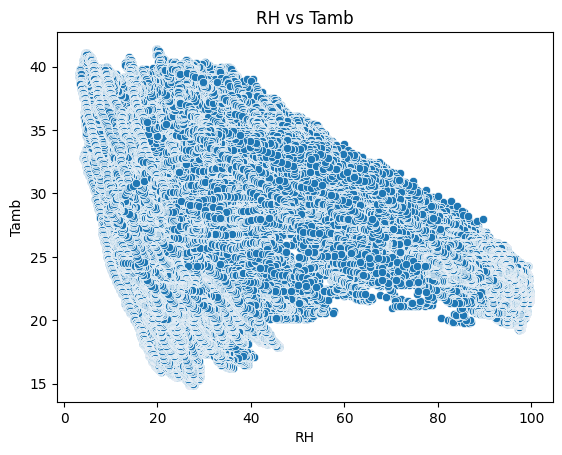

In [36]:
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("WS vs GHI")
plt.show()

sns.scatterplot(x='WSgust', y='GHI', data=df_clean)
plt.title("WSgust vs GHI")
plt.show()

sns.scatterplot(x='WD', y='GHI', data=df_clean)
plt.title("WD vs GHI")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("RH vs Tamb")
plt.show()


Wind & Distribution Analysis

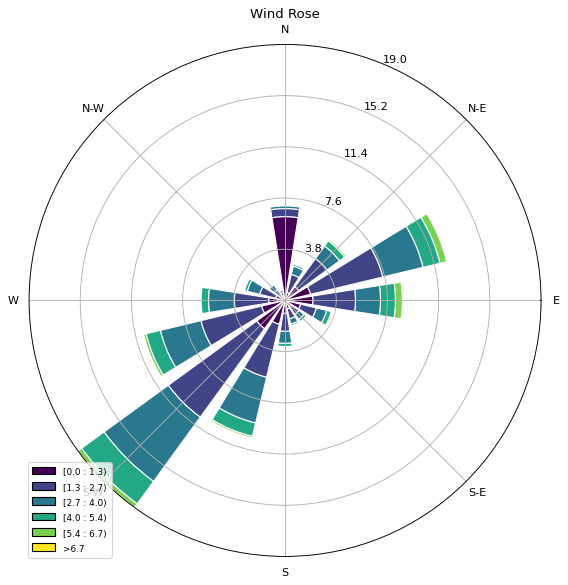

In [37]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose")
plt.show()

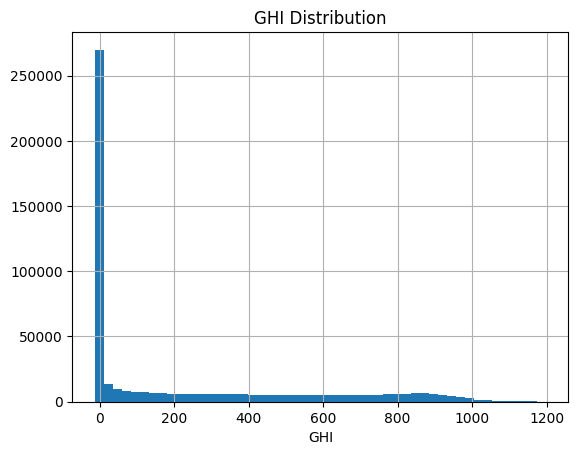

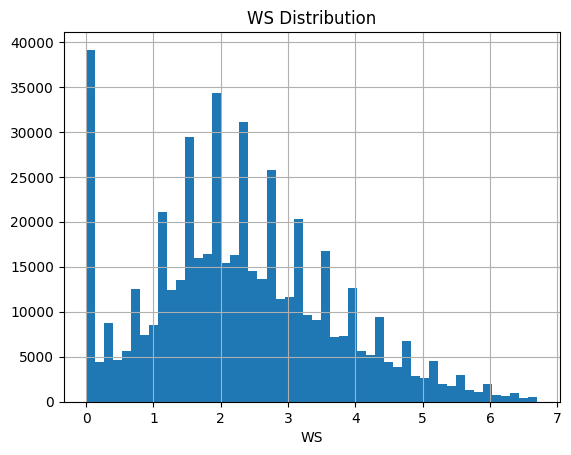

In [38]:
# Histogram
df_clean['GHI'].hist(bins=50)
plt.title('GHI Distribution')
plt.xlabel('GHI')
plt.show()

df_clean['WS'].hist(bins=50)
plt.title('WS Distribution')
plt.xlabel('WS')
plt.show()
